This clustering excercise is a equivalent excercise in Python based on the R one.  
Data attributes are  clustered based on the different clustering mechanisms such as hierarchical and Kmeans . 
No of clusters are decided and for each cluster the attribute statistics is computed for further insiaghts.  


The dataset ( SelfStatedData.csv ) contains self-stated preferences for five attributes concerning tablets. These preferences were obtained from a survey on tablets administered to 50 individuals. The five attributes are:

• Screen: Screen size

• Cell: Cell Connectivity (can the tablet connect to the cellular network?)

• OS: Operating System (does the individual care about the tablet’s operating system?)

• Battery: Battery Life (does the individual care about the battery life?)

• Price: Does the consumer care about the price of the tablet?

The preferences were measured on 7-point scale (1: attribute not important, 7: attribute very important to the individual).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import normalize

In [30]:
from sklearn.cluster import KMeans

In [3]:
import scipy.cluster.hierarchy as shc

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
data = pd.read_csv("SelfStatedData.csv")

In [6]:
import random
random.seed(1990)

In [7]:
data.head()

,ID,Screen,Cell,OS,Battery,Price
0,1,4,5,6,6,6
1,2,6,2,5,7,6
2,3,6,1,7,4,4
3,4,5,6,5,5,5
4,5,6,2,6,7,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ID       50 non-null     int64
 1   Screen   50 non-null     int64
 2   Cell     50 non-null     int64
 3   OS       50 non-null     int64
 4   Battery  50 non-null     int64
 5   Price    50 non-null     int64
dtypes: int64(6)
memory usage: 2.5 KB


In [18]:
## scale the data 
columns = data.columns.tolist()
data_scaled = normalize(data[columns[1:]])
data_scaled = pd.DataFrame(data_scaled, columns=columns[1:])
data_scaled.head()

,Screen,Cell,OS,Battery,Price,cluster
0,0.327693,0.409616,0.491539,0.491539,0.491539,0.000000
1,0.488273,0.162758,0.406894,0.569652,0.488273,0.081379
2,0.550019,0.091670,0.641689,0.366679,0.366679,0.091670
3,0.428746,0.514496,0.428746,0.428746,0.428746,0.000000
4,0.488273,0.162758,0.488273,0.569652,0.406894,0.081379


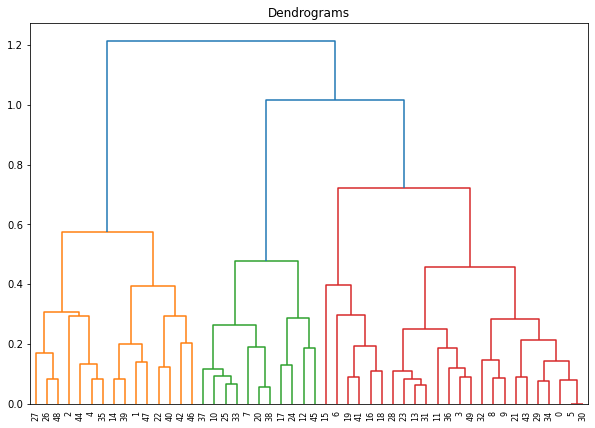

In [10]:
## plot the cluster distances 
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [14]:
Z = shc.ward(data_scaled)
clusters = shc.cut_tree(Z , 4)[:,0]
data['cluster'] = clusters

In [15]:
data.head()

,ID,Screen,Cell,OS,Battery,Price,cluster
0,1,4,5,6,6,6,0
1,2,6,2,5,7,6,1
2,3,6,1,7,4,4,1
3,4,5,6,5,5,5,0
4,5,6,2,6,7,5,1


In [19]:
data[columns[1:]].groupby(['cluster']).agg('mean')

,Screen,Cell,OS,Battery,Price
cluster,,,,,
0,4.777778,5.611111,5.500000,6.388889,6.055556
1,6.000000,2.533333,5.466667,5.800000,5.800000
2,4.666667,5.833333,6.666667,4.833333,3.666667
3,6.272727,5.636364,3.636364,4.545455,6.545455


In [20]:
data['cluster'].value_counts()

0    18
1    15
3    11
2     6
Name: cluster, dtype: int64

In [21]:
Z = shc.ward(data_scaled)
clusters = shc.cut_tree(Z , 2)[:,0]
pd.Series(clusters).value_counts()

0    39
1    11
dtype: int64

In [22]:
data['cluster2'] = clusters

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ID        50 non-null     int64
 1   Screen    50 non-null     int64
 2   Cell      50 non-null     int64
 3   OS        50 non-null     int64
 4   Battery   50 non-null     int64
 5   Price     50 non-null     int64
 6   cluster   50 non-null     int64
 7   cluster2  50 non-null     int64
dtypes: int64(8)
memory usage: 3.2 KB


In [29]:
data[['Screen','Cell','OS','Battery','Price','cluster2']].groupby(['cluster2']).agg('mean')

,Screen,Cell,OS,Battery,Price
cluster2,,,,,
0,5.230769,4.461538,5.666667,5.923077,5.589744
1,6.272727,5.636364,3.636364,4.545455,6.545455


In [18]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
pred_clust = cluster.fit_predict(data_scaled)


In [19]:
pred_clust

array([1, 0, 0, 1, 0, 1, 3, 2, 1, 1, 2, 1, 2, 1, 0, 3, 3, 2, 3, 3, 2, 1,
       0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 0, 0, 3, 0, 1,
       0, 2, 0, 0, 0, 1])

In [20]:
data['cluster'] = pred_clust

In [35]:
## Clustering with K Means
random.seed(1990)
km = KMeans(max_iter = 100 , n_init = 100 , n_clusters = 3).fit(data_scaled)
km_clusters = km.labels_

In [33]:
pd.Series(km_clusters).value_counts()

2    24
1    15
0    11
dtype: int64